# Solution de l'énigme quantique des couleurs de cheveux

## Rappel de l'énigme des 4 chevelures ou des 4 couleurs de cheveux

### L'énigme des 4 couleurs de cheveux est une énigme logique qui se présente sous la forme d'un problème de logique combinatoire. Elle est souvent présentée comme un problème de logique, mais elle peut aussi être considérée comme un problème de mathématiques. Elle est parfois appelée l'énigme des 4 chevelures.
### L'énigme est la suivante :
### - Bob, Charlie, Dahlia et Paris sont quatre personnes qui ont chacune une couleur de cheveux différente : orange ou bleu/indigo.
### - L'objectif est de mettre en place une stratégie avec les autres joueurs/personnages permettant de déterminer la couleur de l'ensemble des chevelures avec la plus grande probabilité possible
### - l'une des stratégies possibles est le concept de parité, c'est-à-dire le caractère pair ou impair d'un nombre
### - Durant le notebook, nous allons utiliser la parité pour déterminer la couleur de cheveux de chaque personnage pour représenter la solution de l'énigme


## Importation des bibliothèques nécessaires

In [48]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

## Création du circuit quantique

In [49]:
problem_qc = QuantumCircuit(8)

### Application des portes de Hadamard aux quatre premiers qubits

#### Ici, on crée 4 portes de hadamard qui représenteront les 3 joueurs : Bob, Paris, Dahlia

In [50]:
problem_qc.h(0)
problem_qc.h(1)
problem_qc.h(2)
problem_qc.h(3)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

### Visualiser le circuit après les portes d'Hadamard

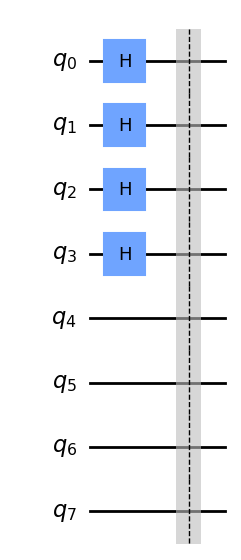

In [51]:
problem_qc.draw('mpl')

## Vérification de la parité des couleurs de cheveux

#### On check si le nombre de couleur de cheveu indigo en face de nous est pair ou impair

In [52]:
problem_qc.cx(1,4)
problem_qc.cx(2,4)
problem_qc.cx(3,4)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

#### Ici, on applique une barrière, elle indique au compilateur de ne pas appliquer d'optimisations de circuit (comme la fusion de portes) à travers cette dite barrière. Cela aide à maintenir la structure du circuit tel qu'il a été conçu, sans modification involontaire lors de la transpilation.

### Visualiser le circuit après la vérification de la parité

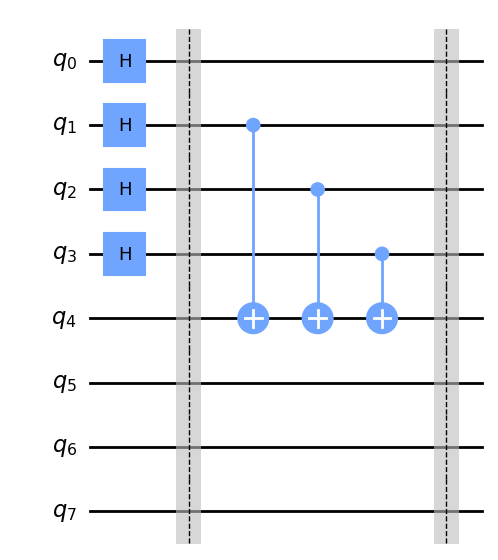

In [53]:
problem_qc.draw('mpl')

## Distribution de l'information à travers les qubits

#### Tout le monde prend note de la réponse et donc on applique une porte de CNOT sur la porte 4 auprès de chaque autre porte, puis on y applique une barrière de nouveau

In [54]:
problem_qc.cx(4,5)
problem_qc.cx(4,6)
problem_qc.cx(4,7)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

### Visualiser le circuit à ce stade

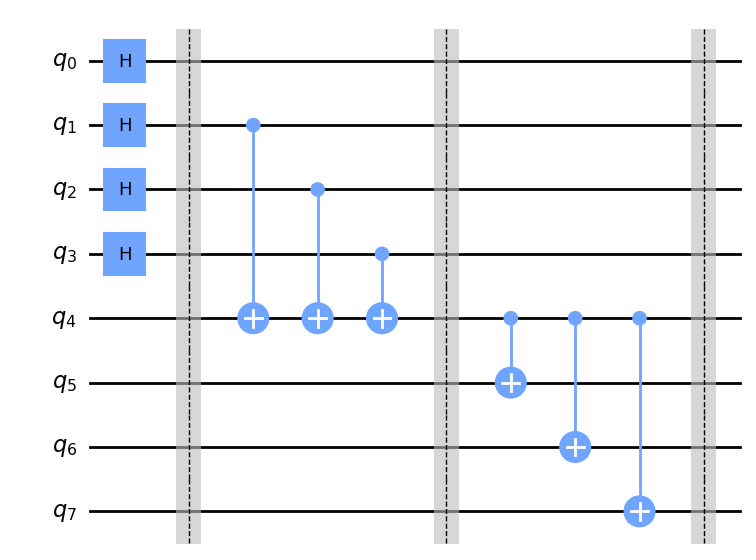

In [55]:
problem_qc.draw('mpl')

## Étapes finales et mesure

#### Bob va checker la parité de la couleur de cheveux en face de lui, ici, cela est représenté par une porte CNOT

In [56]:
problem_qc.cx(2,5)
problem_qc.cx(3,5)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

#### Charlie et Dahlia prennent notes de la réponse, ici, cela est représenté par une porte CNOT

In [57]:
problem_qc.cx(5,6)
problem_qc.cx(5,7)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

#### Charlie va checker la parité de la couleur de cheveux de Dahlia, ici, cela est représenté par une porte CNOT

In [58]:
problem_qc.cx(3,6)
problem_qc.barrier(0, 1, 2, 3, 4, 5, 6, 7)

#### Dahlia prend note de la couleur de cheveux de Charlie, ici, cela est représenté par une porte CNOT

Ici on ajoute une porte CNOT pour que Dahlia puisse prendre note de la couleur de cheveux de Charlie, de plus on va mesurer les qubits pour avoir les résultats finaux, on va donc utiliser la méthode "measure_all" qui va mesurer tous les qubits du circuit. Le paramètre 'inplace=False' permet de ne pas modifier le circuit original.

In [59]:
problem_qc.cx(6,7)
measured_qc = problem_qc.measure_all(inplace=False)

### On visualise la version définitive du circuit et on affiche le circuit après les mesures de chaque valeur grâce à la méthode "measure_all"

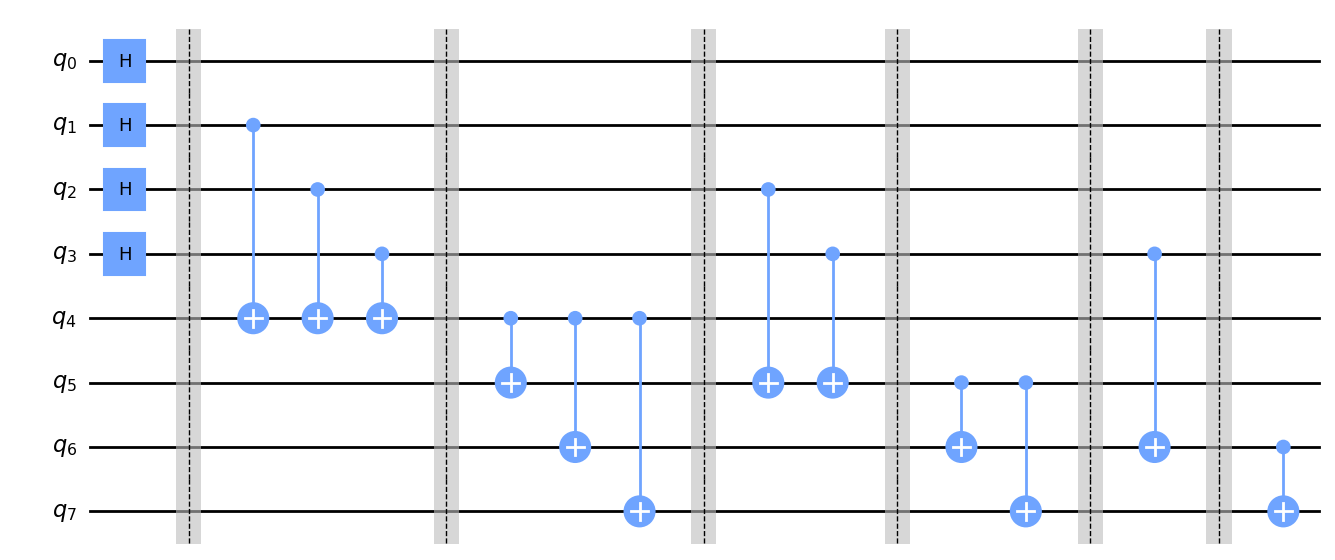

In [60]:
problem_qc.draw('mpl')

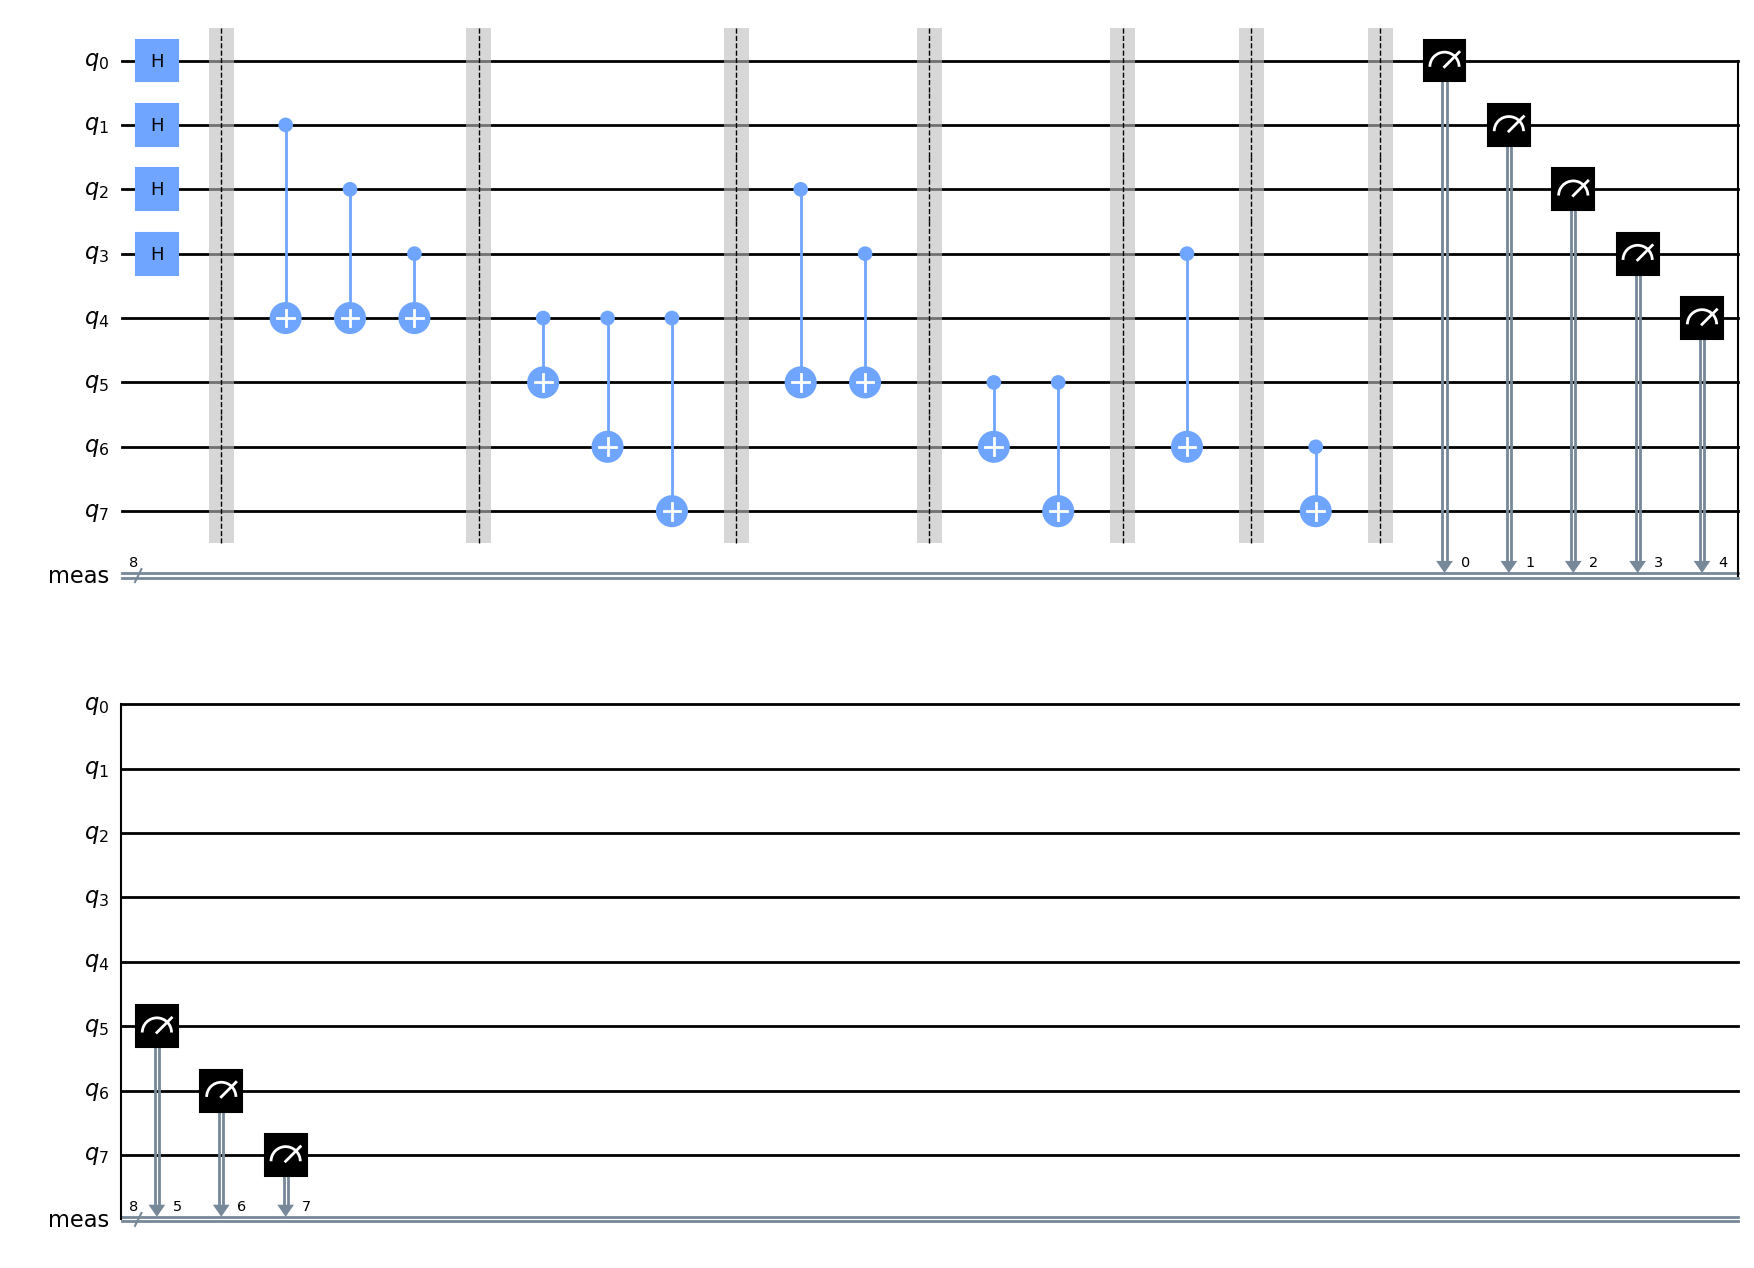

In [61]:
measured_qc.draw('mpl')

#### Dans les résultats finaux, on retrouve les mesures de chaque qubit, ici, on a 8 qubits, donc 8 mesures

## Exécution du circuit

#### Ici on va simuler l'execution dans un simulateur quantique
- On adapte le circuit quantique (measured_qc) au backend spécifié. La transpilation convertit le circuit en un format que le backend peut exécuter. Cela peut inclure la conversion des portes quantiques en un ensemble de portes que le backend spécifique supporte.
- On exécute le circuit transpilé sur le backend spécifié 1024 fois avec le paramètre shots=1024

In [62]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(measured_qc, backend), shots=1024).result()
counts = result.get_counts(measured_qc)

## Traçage des résultats en histogramme

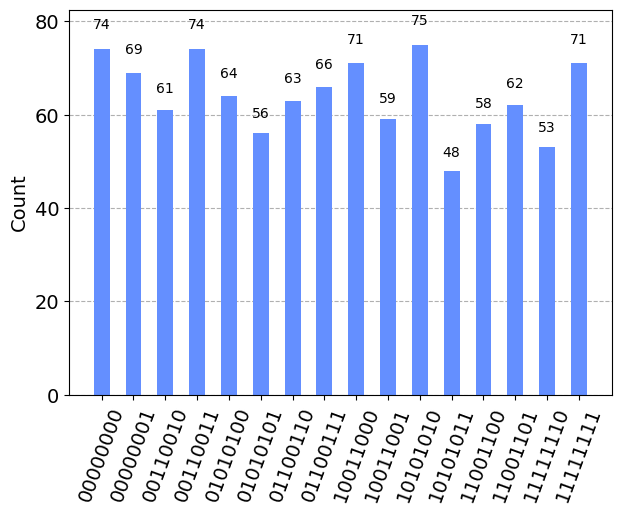

In [63]:
plot_histogram(counts)

### Ici dans le résultat final, on retrouve l'histogramme des possibilités offertes pour chaque chevelure avec leur pourcentage, l'axe des abscisses représentent les chevelures et l'axe des ordonnées celles des pourcentages du taux de découvertes